#Wrangle and Analyse data :     
## Project Topic : Dog rates Data Analysis
###Project Outline : Access data from various sources, including Tweepy, twitter API, Assessing and Visualisation of Data.

###Questions Posed Prior to Data Analysis :    
  * In which language most of tweets are written?
  * What is the most common names, people give their dogs?
  * Considering, accumulated data, Which dogtype has the highest presence in the data set? (Doggo/Floofer/Pupper/Puppo)
  * Given the complete data set, What is the avg. ratio of Favorite Count to Retweet Counts?
  * Visua;lise and asses the difference in values of these two columns.



**Importing Necesary libraries**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


## Gathering Data - Define

### 1. Twitter Archived Enhanced CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Utkarsh doc/twitter-archive-enhanced.csv')

### 2. Image Predictions.tsv

In [ ]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
dfimage = pd.read_csv('/content/image_predictions.tsv', sep='\t')

### 3. Twitter Api Data 

Data was collected using the JSON File as Necessary Documents for the twitter developer account Coudn't be made.


In [ ]:
dftweet = pd.read_json('/content/drive/MyDrive/Utkarsh doc/tweet.json', lines=True)

Note - Code to fetch twitter data using api has been commented out below, due to the above reason.

In [ ]:
"""import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\ntweet_ids = df_1.tweet_id.values\nlen(tweet_ids)\ncount = 0\nfails_dict = {}\nstart = timer()\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[twee

## Assesing The Data

In [ ]:
# Define - Twitter Enhanced Data
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [ ]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
# Define - Image Prediction Data
dfimage.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
dfimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
dfimage.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [ ]:
dfimage.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
# Define - Twitter Api Data
dftweet.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [ ]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [ ]:
dftweet.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

In [ ]:
dftweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


## Cleaning the Data - Code

In [ ]:
df_unclean = df.copy()
dftweet_unclean = dftweet.copy()
dfimage_unclean = dfimage.copy()

In [ ]:
#DF CLeaning
#dropping all irrelevant columns from df, 'twitter_enhanced_archive.csv'
df.drop(['in_reply_to_status_id','source', 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis = 1, inplace = True)

In [ ]:
#checking for null values in new engineered df.
df.isnull().sum()

tweet_id                  0
timestamp                 0
text                      0
retweeted_status_id    2175
rating_numerator          0
rating_denominator        0
name                      0
doggo                     0
floofer                   0
pupper                    0
puppo                     0
dtype: int64

In [ ]:
#merging and creating new column 'dogtype', from below merged four pre defined columns
df['dogtype']= df['doggo'] + df['floofer'] + df['pupper'] + df['puppo']

In [ ]:
#engineering values in the new created column
count = 0
for i,r in enumerate(df.dogtype):
    
    if r == "NoneNoneNoneNone":
      count = count+1
print(count)

1976


In [ ]:
#...engineering values
for i,r in enumerate(df.dogtype):
    
    if r == "NoneNoneNoneNone":
      df.dogtype[i]= "undefined"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for i,r in enumerate(df['dogtype']):
  if 'None' in r:
    df.dogtype[i] = df.dogtype[i].replace('None', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#dropping pre defined columns after merging into new one.
df.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [ ]:
# clean Ratings using Below
ratings = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df.rating_numerator = ratings
df.rating_numerator = df.rating_numerator.astype('float64')

In [ ]:
#dropping 'text' column after using rating values from it.
df.drop(['text'], axis = 1, inplace = True)

In [ ]:
#filtering tweets with retweet_status_id not equal to None, getting rid of all tweets with Null values in that column
df = df[df['retweeted_status_id'] != None]

In [ ]:
#DF TWEET Cleaning
#renaming id to tweet_id for better accessibility across other dataframes
dftweet.rename(columns = {'id':'tweet_id'}, inplace = True)


In [ ]:
#dropping all irrelevant columns from tweepy dataframe
dftweet.drop(['id_str','full_text','truncated','display_text_range','place','contributors','entities','extended_entities','source','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','is_quote_status','favorited','retweeted','possibly_sensitive_appealable','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'], axis=1 , inplace=True)

In [ ]:
# lower case coversion for predictions column in image prediction dataframe.
dfimage["p1"] = dfimage["p1"].str.lower()
dfimage["p2"] = dfimage["p2"].str.lower()
dfimage["p3"] = dfimage["p3"].str.lower()

In [ ]:
#merging all cleaned data into one new dataframe for better analysis and visualization.
newdf = pd.merge(df, dfimage, on="tweet_id")
merged_clean_data = pd.merge(newdf, dftweet, on="tweet_id")

### Storing Data

In [ ]:
df.to_csv('tweet_enhanced_cleaned.csv', index = False)
dftweet.to_csv('tweetapi_cleaned.csv', index = False)
dfimage.to_csv('image_prediction_cleaned.csv', index = False)
merged_clean_data.to_csv('twitter_archive_master.csv', index = False)

Cleaned and merged data has been stored here as csv.

In [ ]:
newdf = merged_clean_data

## Analysing The Data - Test

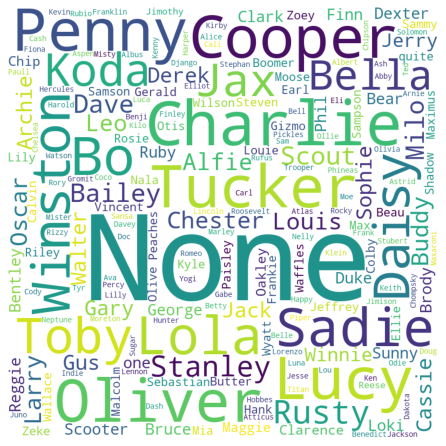

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(newdf['name']))
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

here we can say bigger percentage of our dog names have 'None' , so we drop it from our word cloud, giving us a better view of names in word cloud.

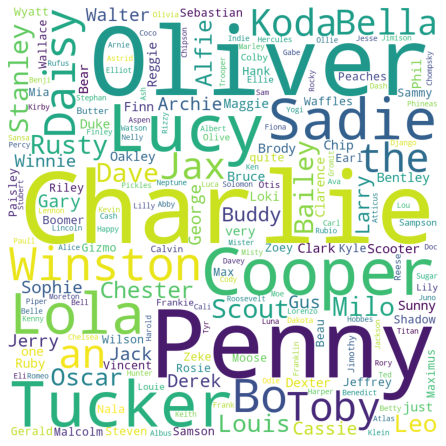

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = ['None'],
                min_font_size = 10).generate(' '.join(newdf['name']))
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

I see Charlie, Oliver, Cooper, Penny and Lucy are few of the most common names given in our dataframe.
(rest all other names are present in word cloud that have less frequency.)

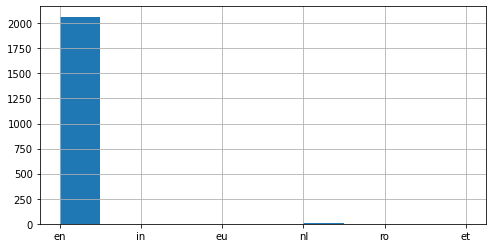

In [ ]:
plt.figure(figsize = (8,4), facecolor = None)
newdf['lang'].hist()

From above histogram plot we can clearly infer that, majority of our tweets (close to 99%) are in 'en', which stands for 'English' language.

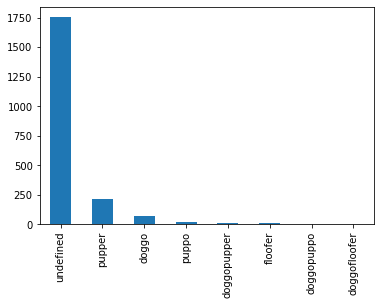

In [ ]:
newdf.dogtype.value_counts().plot.bar()

It is clear, major percent of our dogs do not have any defined dog type. So performing calculations on this factor can easily affect the dignity of our datafrae. Hence I have created a separated df of dogtypes with legit values :

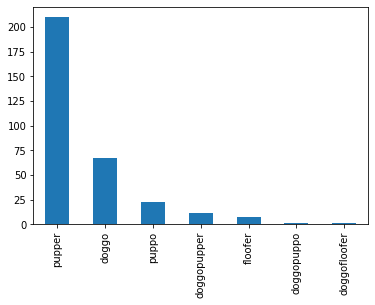

In [ ]:
a = newdf.loc[newdf['dogtype'] !="undefined"]
a.dogtype.value_counts().plot.bar()

* Most of dogs with defined type are : 'pupper'.
* Followed by : 'doggo' and 'puppo'

In [ ]:
rmean = newdf['retweet_count'].mean()
fmean = newdf['favorite_count'].mean()
print (rmean,fmean,fmean/rmean)

2976.0892426435116 8556.718282682103 2.875155139864555


**Mean and Ratio of Favorite Counts to that of Retweet Counts. :      **
  * Mean Retweet Count = 2976.089(approz)
  * Mean Favorite Count = 8556.71(approz)

**Ratio of Mean Favorite Count to Retweet count** = **2.87** (approx)
This indicates user tendency of adding tweets more to their **Favorite** than **Retweeting** a tweet.

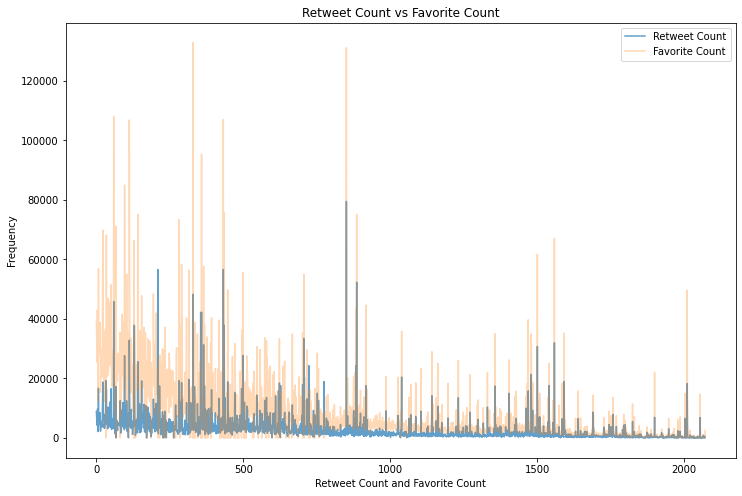

In [ ]:
plt.figure(figsize = (12,8), facecolor= None)
plt.plot(newdf['retweet_count'],alpha=0.7)
plt.plot(newdf['favorite_count'],alpha=0.3)
plt.xlabel("Retweet Count and Favorite Count")
plt.ylabel("Frequency")
plt.title ("Retweet Count vs Favorite Count")
plt.legend(['Retweet Count', 'Favorite Count'])

**Infering from line graph above:**
We can clearly understand the trends followed by these two entities:
* People tend more to add a tweet to their favorites than retweeting a tweet.
* Mean of Favorite Count > Retweet Count.
* Max value of Favorite Count > Retweet Count.

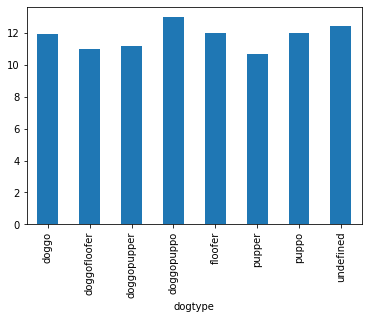

In [ ]:
newdf.groupby(['dogtype']).rating_numerator.mean().plot.bar()

**Given above bar plot:**
We can see, despite being sygnificantly less in number, dogs of 'doggopuppo', category have highest mean rating overall, which are followed by 'undefined', 'doggo'and 'floofer', consecutively. 